In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn import metrics

%matplotlib inline

# Load the Data

In [5]:
df = pd.read_csv(r"C:\Users\almal\Desktop\cleaned_dataset_A.csv")

In [7]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


# Preprocess the Data

In [10]:
# Drop the 'position_encoded' column because there is another column with the same meaning
df.drop(['position_encoded'], axis=1, inplace=True)

# Keeping the original 'position' column intact for further encoding steps

In [12]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,0


In [14]:
# Split all features into categorical and numeric
categorical_features = ['team','position']
numeric_features = ['height' , 'age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','winger']

In [16]:
# one hot encoding for categorical_features
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [18]:
df.shape

(5735, 387)

In [20]:
p33 = df['current_value'].quantile(0.33)  # Lower than 33rd percentile
p66 = df['current_value'].quantile(0.66)  # Medium: Between 33rd and 66th percentile



def categorize_values(value):
    if value <= p33:
        return 'Low'
    elif p33 < value <= p66:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['current_value_category'] = df['current_value'].apply(categorize_values)

df.drop('current_value', axis=1, inplace=True)

In [22]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category']) 

In [24]:
df.drop('current_value_category', axis=1, inplace=True)

# Feature selection

In [27]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
age                               0.086087
team_Torpedo Moscow               0.052859
position_Goalkeeper               0.050715
team_FC Emmen                     0.048126
                                    ...   
team_Elche CF                    -0.056541
assists                          -0.101854
minutes played                   -0.178917
appearance                       -0.180323
highest_value                    -0.497711
Name: current_value_category_encoded, Length: 387, dtype: float64


In [29]:
threshold = 0.07 

selected_features = correlation[abs(correlation['current_value_category_encoded']) > threshold]['current_value_category_encoded'].index
selected_features

Index(['age', 'appearance', 'assists', 'minutes played', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [31]:
selected_features = ['age', 'appearance', 'assists', 'minutes played', 'highest_value',
       'current_value_category_encoded']

In [33]:
df = df[selected_features]
df.head()

,age,appearance,assists,minutes played,highest_value,current_value_category_encoded
0,21.0,34,0.000000,2758,2000000,0
1,20.0,39,0.064562,2788,800000,2
2,18.0,51,0.102506,3512,800000,2
3,25.0,65,0.000000,5867,2000000,0
4,33.0,31,0.000000,2790,3500000,2


In [35]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)
y = df['current_value_category_encoded']

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Model

In [38]:
model = KNeighborsClassifier()

In [71]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

# Train the Decision Tree

In [74]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [2, 3, 4, 5]}, scoring='f1_macro',
             verbose=1)

In [76]:
grid_search.best_params_

{'n_neighbors': 4}

In [78]:
model = grid_search.best_estimator_

# Test the model

In [81]:
y_pred = model.predict(X_test_scaled) 

# Evaluating the Model 

In [84]:
base_model = round(df['current_value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

38.19

In [86]:
# Calculate accuracy on testing
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7768090671316478

In [88]:
# Calculate accuracy on training
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8624673060156931

In [ ]:
#

In [90]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
precision

0.7694505417568598

In [92]:
# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
recall

0.7706402037335334

In [94]:
# Calculate F1 score
F1 = f1_score(y_test, y_pred, average='macro')
F1

0.765624088935693

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[319,   7,  31],
       [  9, 374,  50],
       [ 66,  93, 198]], dtype=int64)

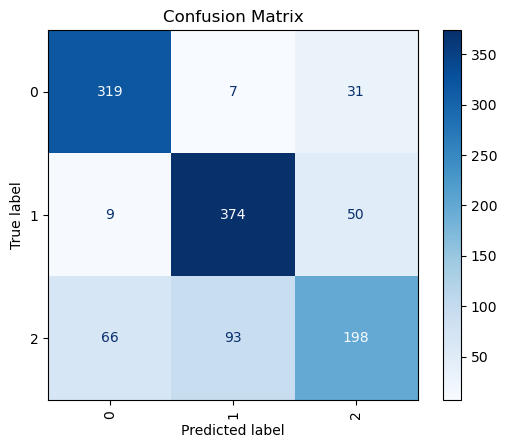

In [98]:
# Heatmap for the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       357
           1       0.79      0.86      0.82       433
           2       0.71      0.55      0.62       357

    accuracy                           0.78      1147
   macro avg       0.77      0.77      0.77      1147
weighted avg       0.77      0.78      0.77      1147

